# Genetic Algorithms

Genetic Algorithms are based on the ideas of natural selection. They are primarily used for optimisation and search problems.
Generally, they use three "biological" operators: mutation, crossover and selection.

A genetic algorithm requires
- a representation of all the "organisms" in a population
- a fitness function

A general outline of the algorithm is as follows:
1. Initialise a random population
2. Selection of "organisms" to reproduce
3. Apply genetic operators
4. Termination

Steps 2 and 3 are repeated until an acceptable solution is found.

## Applications
Genetic algorithms can be applied to various problems, such as timetabling and scheduling, the travelling salesman problem, solving sudokus and hyperperameter optimisation.

Ideas such as elitism can be used to further improve genetic algorithms, however they do have some limitations.

- They rely heavily on the fitness function to evaluate each solution
- They have a tendency to converge to a local optima
- They don't scale well with complexity

TSP problem where we start at finish at the origin (0,0)

In [1]:
import numpy as np
np.random.seed(0)

from time import time

In [2]:
# Create a list of n_nodes random nodes
def create_nodes(n_nodes):
    nodes = []
    for _ in range(n_nodes):
        nodes.append((np.random.randint(0,1000), np.random.randint(0,1000)))

    return nodes

nodes = create_nodes(10)

In [3]:
# TSP Class
class TSP:
    # Initialise class given a list of nodes and origin
    def __init__(self, nodes, origin=(0,0), rand=True):
        self.n = len(nodes)
        self.origin = origin
        self.nodes = nodes.copy()
        
        # Randomise order of list to create random solutions to TSP
        if rand:
            np.random.shuffle(self.nodes)

    def __str__(self):
        return str(self.nodes)

    def __eq__(self, other):
        return self.get_score() == other.get_score()

    def __gt__(self, other):
        return self.get_score() > other.get_score()

    # Find the distance between two nodes.
    def get_dist(self, a, b):
        # Find the distance between a and b
        return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

    # Get the current score of the solution
    def get_score(self):
        # Calculate the distance of our path and then add the distance between the origin and the first node and the origin and the last node
        total = 0
        for i in range(1, self.n - 1):
            total += self.get_dist(self.nodes[i-1], self.nodes[i])

        total += self.get_dist(self.origin, self.nodes[0]) + self.get_dist(self.nodes[self.n - 1], self.origin)
        return total

    # Return list of nodes in order
    def get_nodes(self):
        return self.nodes

    # Mutate the solution. Randomly swap two nodes.
    def mutate(self):
        i = np.random.randint(0,self.n)
        j = np.random.randint(0,self.n)
        self.nodes[i], self.nodes[j] = self.nodes[j], self.nodes[i]

    # Add two solutions together. Cut a section from one list and insert it into the other.
    def __add__(self, x):
        # AKA crossover
        x_nodes = x.get_nodes()

        # Cut start and end
        cut = [np.random.randint(1,self.n), np.random.randint(1,self.n)]
        cut_s = min(cut)
        cut_e = max(cut)
        
        child = [None]*self.n
        
        for i in range(cut_s, cut_e):
            child[i] = x_nodes[i]

        # Avoid duplicates
        for i in range(self.n):
            if child[i] == None:
                for j in range(self.n):
                    if not self.nodes[j] in child:
                        child[i] = self.nodes[j]
            
        return TSP(child, self.origin, False)

    def copy(self):
        return TSP(self.nodes, self.origin, False)


In [4]:
# GA paramaters

P = 64 # Population size
N = 1000 # Number of generations
E = 1 # Number of best solutions to keep (elitism)
R = int(P / 16) # Number of random solutions to introduce
M = int(P/4) + 1 # Number of solutions to mutate

origin = (0,0) # Start and end node

def ga(nodes, verbose = False):

    # Time solution
    start_time = time()
    
    # Create an initial population
    population = []
    for _ in range(P):
        population.append(TSP(nodes))
    
    # Sort the population by score, lowest scoring (best) first
    population.sort()

    # Start training loop
    for g in range(N):
        
        # Create weights to prioritise better solutions for selection
        weights = [(P - x)/(0.5*P*(P+1)) for x in range(P)]
        children = []

        # Crossover
        for _ in range(P - E - R - M):
            reproducers = [np.random.choice(population, 1, p=weights)[0], np.random.choice(population, 1)[0]]
    
            child = reproducers[0] + reproducers[1]
            children.append(child)

        # Randomised solutions
        for _ in range(R):
            child = TSP(nodes, origin)
            children.append(child)

        # Mutations
        for _ in range(M):
            child = np.random.choice(population,1)[0].copy()
            child.mutate()
            children.append(child)

        # Elitism
        for e in range(E):
            children.append(population[e])

        
        population = children.copy()
    
        population.sort()

        # Print score
        if verbose and g % 50 == 0:
            print("Current best weight: " + str(population[0].get_score()))

    # Get the best solution
    best_nodes = population[0].get_nodes()

    end_time = time()
    ga_time = end_time - start_time

    # Return the best solution, score and time taken
    return best_nodes, population[0].get_score(), ga_time

ga_best_nodes, ga_best_score, ga_time = ga(nodes, True)
print("\n")
print("Best solution weight: ", str(ga_best_score))
print("Time taken: " + str(ga_time) + "s")

Current best weight: 3339.9685930447476
Current best weight: 2869.605202996355
Current best weight: 2829.9249510504214
Current best weight: 2829.9249510504214
Current best weight: 2829.9249510504214
Current best weight: 2829.9249510504214
Current best weight: 2829.9249510504214
Current best weight: 2829.9249510504214
Current best weight: 2829.9249510504214
Current best weight: 2829.9249510504214
Current best weight: 2829.9249510504214
Current best weight: 2829.9249510504214
Current best weight: 2829.9249510504214
Current best weight: 2764.5200599396853
Current best weight: 2764.5200599396853
Current best weight: 2764.5200599396853
Current best weight: 2764.5200599396853
Current best weight: 2764.5200599396853
Current best weight: 2764.5200599396853
Current best weight: 2764.5200599396853


Best solution weight:  2764.5200599396853
Time taken: 18.952854871749878s


In [5]:
# Brute force approach.
from sys import maxsize 
from itertools import permutations

def brute_force(nodes):
    start_time = time()
    
    N = len(nodes)
    
    def dist(a, b):
        # Find the distance between a and b
        return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)
    
    # store all vertex apart from source vertex 
    # store minimum weight Hamiltonian Cycle 
    best_path_weight = maxsize 
    all_permutations=permutations(nodes)
    best_path = None
    
    for permutation in all_permutations:
     
        # store current Path weight(cost) 
        current_pathweight = 0
     
        # Calculate the distance of our path and then add the distance between the origin and the first node and the origin and the last node
        for i in range(1, N - 1):
            current_pathweight += dist(permutation[i-1], permutation[i])
    
        current_pathweight += dist(origin, permutation[0]) + dist(permutation[N - 1], origin)
     
        # update minimum 
        best_path_weight = min(best_path_weight, current_pathweight)
        if best_path_weight == current_pathweight:
            best_path = permutation
    
    end_time = time()
    
    bf_time = end_time - start_time

    return best_path, best_path_weight, bf_time

best_path, bpw, bft = brute_force(nodes)
print("Best solution weight: ", str(bpw))
print("Time taken: " + str(bft) + "s")

Best solution weight:  2753.279654642227
Time taken: 49.672430992126465s


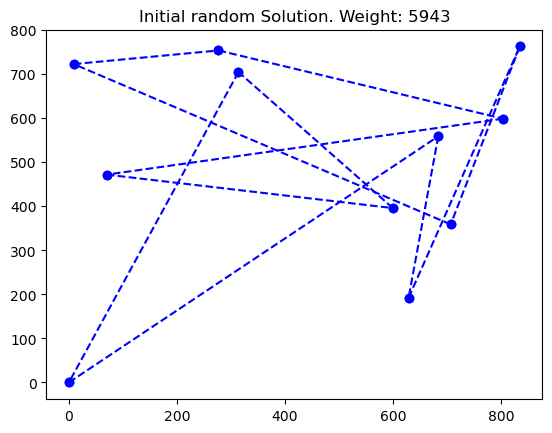

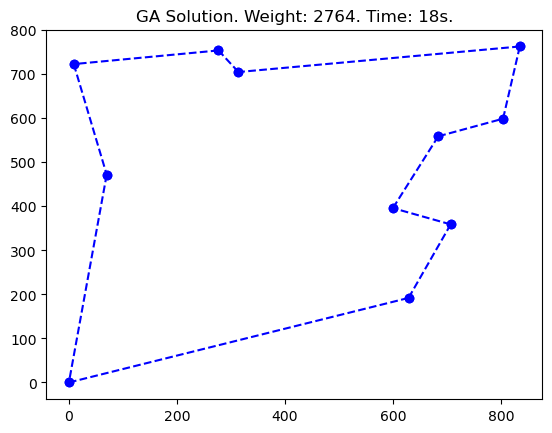

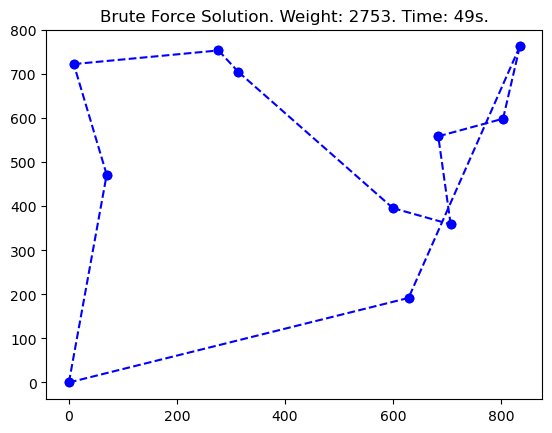

In [6]:
# Plot graphs
import matplotlib.pyplot as plt


# Plot the initial random solution
x_values = [0, nodes[0][0]]
y_values = [0, nodes[0][1]]
plt.plot(x_values, y_values, 'bo', linestyle="--")

for n_i in range(len(ga_best_nodes) - 1):
    x_values = [nodes[n_i][0], nodes[n_i + 1][0]]
    y_values = [nodes[n_i][1], nodes[n_i + 1][1]]
    plt.plot(x_values, y_values, 'bo', linestyle="--")

x_values = [nodes[len(nodes) - 1][0], 0]
y_values = [nodes[len(nodes) - 1][1], 0]
plt.plot(x_values, y_values, 'bo', linestyle="--")
plt.title("Initial random Solution. Weight: " + str(int(TSP(nodes, origin, False).get_score())))

plt.show()

# Plot the solution found by the GA
x_values = [0, ga_best_nodes[0][0]]
y_values = [0, ga_best_nodes[0][1]]
plt.plot(x_values, y_values, 'bo', linestyle="--")

for n_i in range(len(ga_best_nodes) - 1):
    x_values = [ga_best_nodes[n_i][0], ga_best_nodes[n_i + 1][0]]
    y_values = [ga_best_nodes[n_i][1], ga_best_nodes[n_i + 1][1]]
    plt.plot(x_values, y_values, 'bo', linestyle="--")

x_values = [ga_best_nodes[len(ga_best_nodes) - 1][0], 0]
y_values = [ga_best_nodes[len(ga_best_nodes) - 1][1], 0]
plt.plot(x_values, y_values, 'bo', linestyle="--")
plt.title("GA Solution. Weight: " + str(int(ga_best_score)) + ". Time: " + str(int(ga_time)) + "s.")
plt.show()

# Plot the optimal solution found by the genetic algorithm

x_values = [0, best_path[0][0]]
y_values = [0, best_path[0][1]]
plt.plot(x_values, y_values, 'bo', linestyle="--")

for n_i in range(len(best_path) - 1):
    x_values = [best_path[n_i][0], best_path[n_i + 1][0]]
    y_values = [best_path[n_i][1], best_path[n_i + 1][1]]
    plt.plot(x_values, y_values, 'bo', linestyle="--")

x_values = [best_path[len(best_path) - 1][0], 0]
y_values = [best_path[len(best_path) - 1][1], 0]
plt.plot(x_values, y_values, 'bo', linestyle="--")
plt.title("Brute Force Solution. Weight: " + str(int(bpw)) + ". Time: " + str(int(bft)) + "s.")
plt.show()


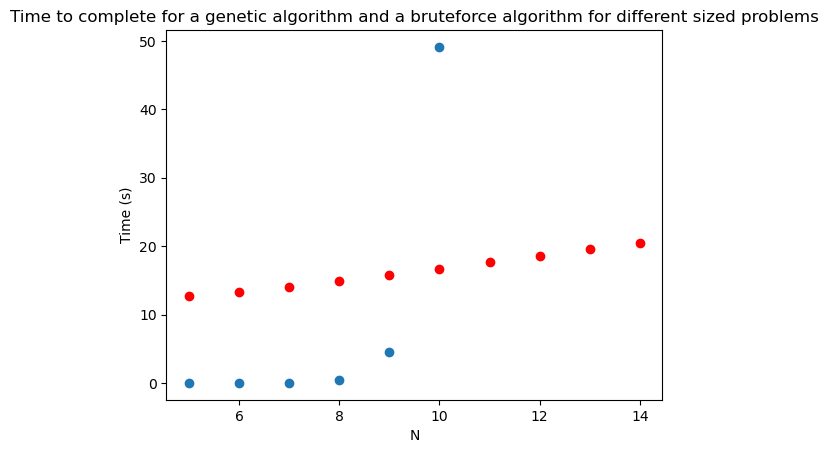

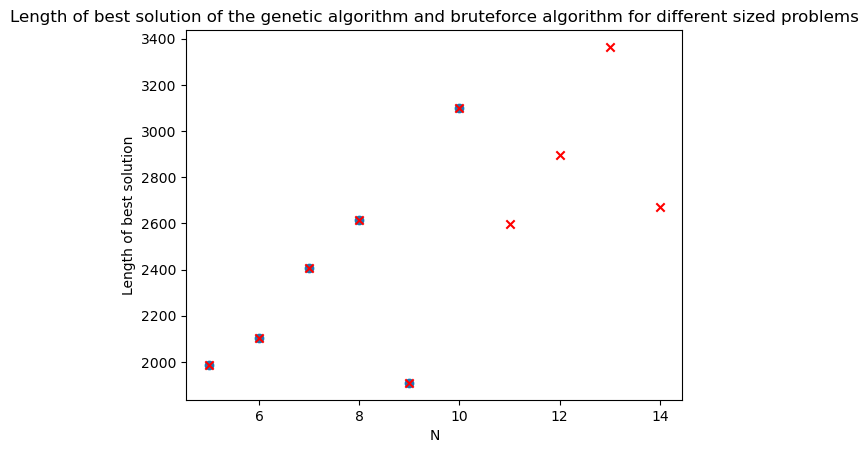

In [7]:
times_ga = []
times_bf = []

sol_ga = []
sol_bf = []

n_ga = []
n_bf = []

for n in range(5,15):
    nodes = create_nodes(n)
    if n < 11:
        best_path, bpw, bft = brute_force(nodes)

        times_bf.append(bft)
        sol_bf.append(bpw)
        n_bf.append(n)
    
    ga_best_nodes, ga_best_score, ga_time = ga(nodes)
    
    times_ga.append(ga_time)
    sol_ga.append(ga_best_score)
    
    n_ga.append(n)


plt.scatter(n_bf, times_bf)
plt.scatter(n_ga, times_ga, c="red")
plt.title("Time to complete for a genetic algorithm and a bruteforce algorithm for different sized problems")
plt.xlabel("N")
plt.ylabel("Time (s)")

plt.show()

plt.scatter(n_bf, sol_bf)
plt.scatter(n_ga, sol_ga, c="red", marker="x")
plt.title("Length of best solution of the genetic algorithm and bruteforce algorithm for different sized problems")
plt.xlabel("N")
plt.ylabel("Length of best solution")

plt.show()